In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/data_clean.csv')

df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0


# Algunas columnas que podrían ser útiles para mostrar gráfica

In [3]:
precio_litro_dicc= {'E10':1.38, 'SP98':1.46}
df['price_fuel'] = df['gas_type'].map(precio_litro_dicc )
df['euros_100km'] = df.apply(lambda row: row['consume']*row['price_fuel'], axis=1)
df['cost_trip'] = df.apply(lambda row: row['euros_100km']*row['distance']/100, axis=1)

In [4]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow,price_fuel,euros_100km,cost_trip
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0,1.38,6.900,1.932000
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0,1.38,5.796,0.695520
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0,1.38,7.590,0.850080
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0,1.38,5.382,0.694278
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0,1.38,6.210,1.148850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0,1.46,5.402,0.864320
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0,1.46,6.278,1.010758
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0,1.46,5.548,0.887680
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0,1.46,6.716,1.034264


# Graficas

Veamos algunas gráficas que nos ayuden a entender la inforamción

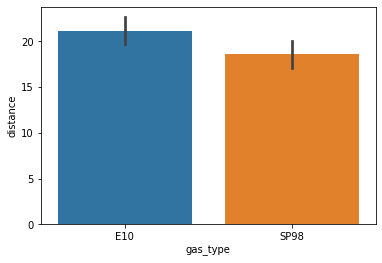

In [5]:
sns.barplot(x="gas_type", y="distance", data=df, ci=68);

Se han recorrido muchos más km con SP98

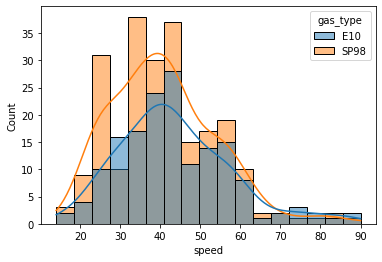

In [6]:
sns.histplot(data=df, x="speed", hue="gas_type",kde=True);

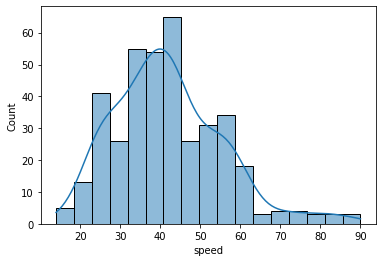

In [7]:
sns.histplot(data=df, x="speed",kde=True);

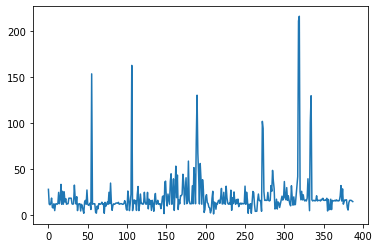

In [8]:
df.distance.plot();

Vemos que hay 6 tramos en los que dice haber recorrido entre 100 y 200 km, mientras que el resto está, generalmente en distancia menores de 50km

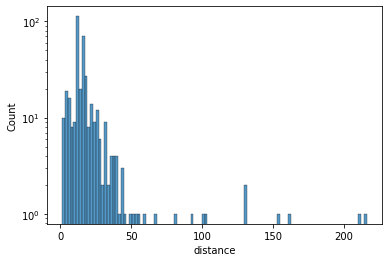

In [9]:
g = sns.histplot(data=df, x="distance");
g.axes.set_yscale('log')

Veamos el consumo por cada tipo de combustible. Estaríamos tentados a hacer la média habitual pero tenemos que tener cuidado: cada dato está poderado por la distancia recorrida.

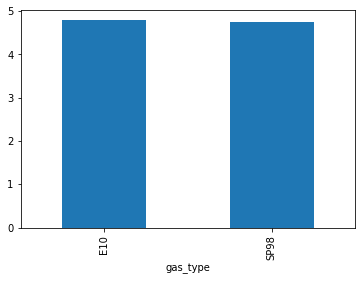

In [10]:
df.groupby("gas_type").apply(lambda dfx: (dfx["consume"] * dfx["distance"]).sum() / dfx["distance"].sum()).plot.bar();

In [11]:
df.groupby("gas_type").apply(lambda dfx: (dfx["consume"] * dfx["distance"]).sum() / dfx["distance"].sum())

gas_type
E10     4.782521
SP98    4.740464
dtype: float64

Veamos los euros por km por combustible. Estaríamos tentados a hacer la média habitual pero tenemos que tener cuidado: cada dato está poderado por la distancia recorrida. 

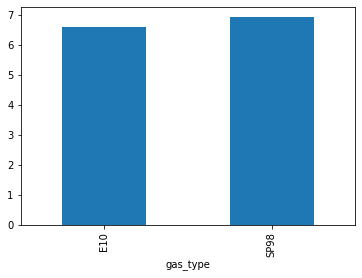

In [12]:
df.groupby("gas_type").apply(lambda dfx: (dfx["euros_100km"] * dfx["distance"]).sum() / dfx["distance"].sum()).plot.bar();


In [13]:
df.groupby("gas_type").apply(lambda dfx: (dfx["euros_100km"] * dfx["distance"]).sum() / dfx["distance"].sum())


gas_type
E10     6.599878
SP98    6.921078
dtype: float64

Coste por 100km según cada combustible


La velocidad media es de:

In [14]:
round((df["speed"] * df["distance"]).sum() / df["distance"].sum(),0)

51.0

In [15]:
df.groupby("gas_type").apply(lambda dfx: (dfx["speed"] * dfx["distance"]).sum() / dfx["distance"].sum())

gas_type
E10     52.031789
SP98    49.686393
dtype: float64

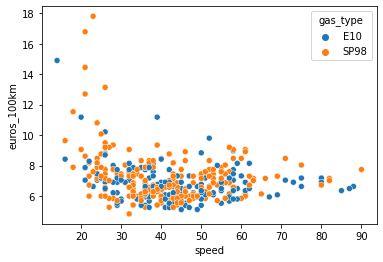

In [16]:
sns.scatterplot(data=df, x='speed', y='euros_100km', hue='gas_type');


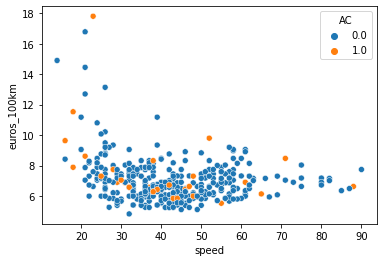

In [17]:
sns.scatterplot(data=df, x='speed', y='euros_100km', hue='AC');


El consumo, con aire acondicionado sube:

In [18]:
df.groupby('AC').mean()['consume']

AC
0.0    4.883520
1.0    5.256667
Name: consume, dtype: float64

Vemos cómo el consumo en función de distancias

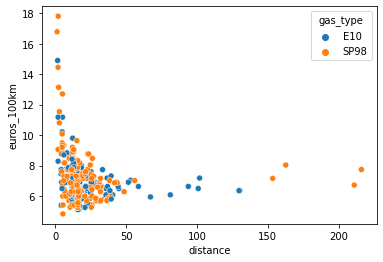

In [19]:
sns.scatterplot(data=df, x='distance', y='euros_100km', hue='gas_type');


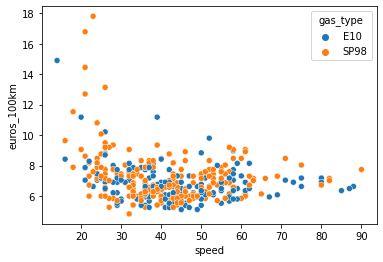

In [20]:
sns.scatterplot(data=df, x='speed', y='euros_100km', hue='gas_type');


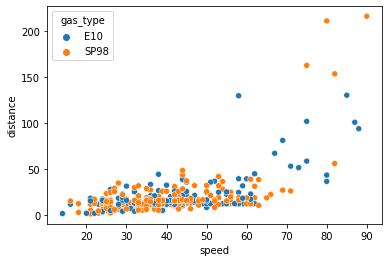

In [21]:
sns.scatterplot(data=df, x='speed', y='distance', hue='gas_type');


Podemos  ver cómo evidentemente los trayectos cortos son los de velocidades bajas y los de distancias más altas son las que aumentan la velocidad. Existirá, evidentemente relación entre ambas variables. Aún así, ambas variables nos aportarán información.

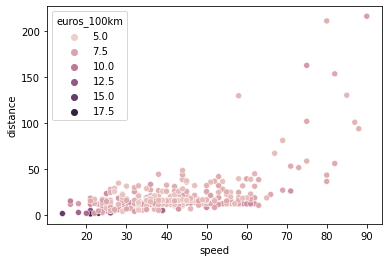

In [22]:
sns.scatterplot(data=df, x="speed", y="distance", hue="euros_100km");

# Distancias cortas

In [23]:
df_cortas=df[df.distance<=50].copy()
df_largas=df[df.distance>50].copy()

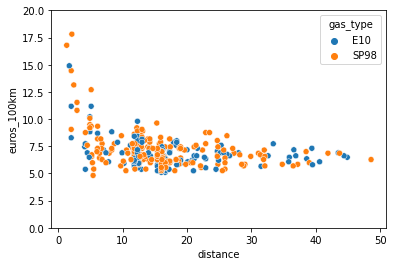

In [24]:
sns.scatterplot(data=df_cortas, x='distance', y='euros_100km', hue='gas_type');
plt.ylim(0, 20);


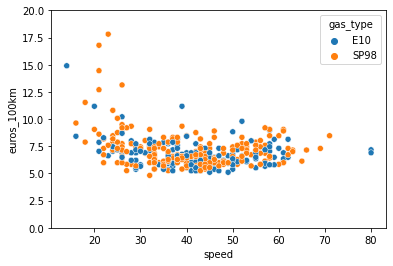

In [25]:
sns.scatterplot(data=df_cortas, x='speed', y='euros_100km', hue='gas_type');
plt.ylim(0, 20);

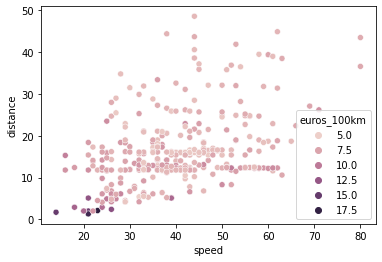

In [26]:
sns.scatterplot(data=df_cortas, x="speed", y="distance", hue="euros_100km");

Veamos ahora la comparativa entre distancias laras con consumo y euros_100km

# Distancias largas



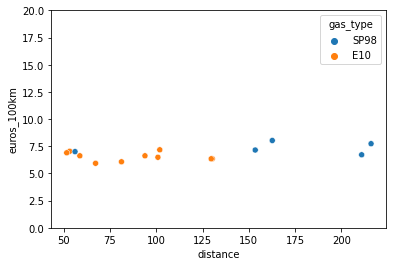

In [27]:
sns.scatterplot(data=df_largas, x='distance', y='euros_100km', hue='gas_type');
plt.ylim(0, 20);

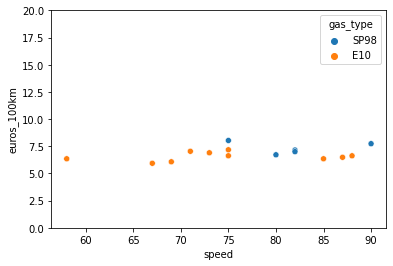

In [28]:
sns.scatterplot(data=df_largas, x='speed', y='euros_100km', hue='gas_type');
plt.ylim(0, 20);

(50.0, 100.0)

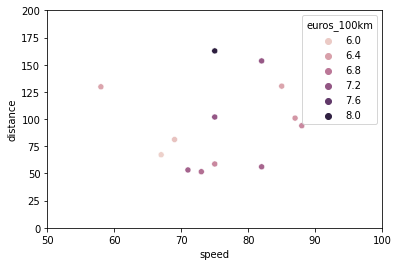

In [29]:
sns.scatterplot(data=df_largas, x="speed", y="distance", hue="euros_100km");
plt.ylim(0, 200)
plt.xlim(50, 100)

# Aire acondicionado

In [30]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow,price_fuel,euros_100km,cost_trip
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0,1.38,6.900,1.932000
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0,1.38,5.796,0.695520
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0,1.38,7.590,0.850080
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0,1.38,5.382,0.694278
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0,1.38,6.210,1.148850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0,1.46,5.402,0.864320
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0,1.46,6.278,1.010758
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0,1.46,5.548,0.887680
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0,1.46,6.716,1.034264


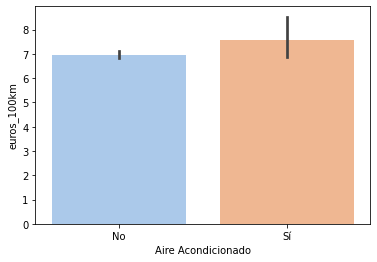

In [35]:
df['Aire Acondicionado'] = df['AC'].map({1.0: 'Sí', 0.: 'No'})
g =sns.barplot(x='Aire Acondicionado', y="euros_100km", data=df, palette="pastel");

plt.show()

In [36]:
data = df.groupby("Aire Acondicionado").apply(lambda dfx: (dfx["euros_100km"] * dfx["distance"]).sum() / dfx["distance"].sum())
data

Aire Acondicionado
No    6.761522
Sí    7.011872
dtype: float64

In [37]:
round((data[1] / data[0] - 1)*100,1)

3.7

Los viajes con aire acondicionado cuestan entre 3.5 y 4 porciento más de combustible.